In [13]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import re

In [4]:
datapath = r'C:\Users\vidha\Machine Learning\Final\Animals'

In [7]:
totalimages = 0
for dirpath, dirnames, filenames in os.walk(datapath):
    for file in filenames:
        if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith(".png"):
            totalimages += 1
totalimages

582

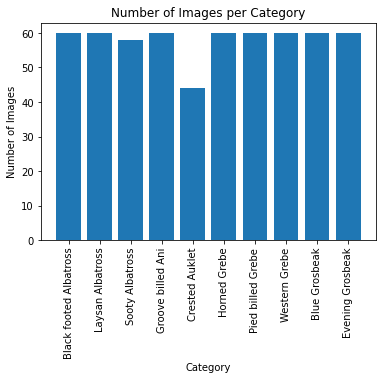

In [21]:
categories = {}
for dirpath, dirnames, filenames in os.walk(datapath):
    animal = os.path.basename(dirpath)
    if animal == 'Animals' or animal in categories:
        continue
    animal = re.sub(r'[\d.]+', '', animal)
    animal = animal.replace('_', ' ')
    count = sum(1 for file in filenames if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith(".png"))
    categories[animal] = count
    
plt.bar(categories.keys(), categories.values())
plt.title('Number of Images per Category')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
import cv2
import numpy as np

# Define the path to the main folder
path_to_folder = "Final/Animals/"

# Loop through all subdirectories inside the main folder
for subdir in os.listdir(path_to_folder):

    # Define the path to the subdirectory
    subdir_path = os.path.join(path_to_folder, subdir)

    # Check if the subdirectory is a directory
    if os.path.isdir(subdir_path):

        # Loop through all image files inside the subdirectory
        for file in os.listdir(subdir_path):

            # Define the path to the image file
            file_path = os.path.join(subdir_path, file)

            # Check if the file is an image file
            if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith(".png"):

                # Read the image file
                img = cv2.imread(file_path)

                # Apply background removal using the GrabCut algorithm
                # ...
                mask = np.zeros(img.shape[:2], np.uint8)

                # Define the rectangle containing the object you want to keep
                rect = (50,50,450,290)

                # Initialize the background and foreground models using the rectangle
                bgdModel = np.zeros((1, 65), np.float64)
                fgdModel = np.zeros((1, 65), np.float64)
            
                # Apply the GrabCut algorithm to the image to obtain the new mask
                cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

                # Create a new mask with only the foreground pixels set to 1
                new_mask = np.where((mask == 1) + (mask == 3), 255, 0).astype('uint8')

                # Apply the new mask to the original image
                result = cv2.bitwise_and(img, img, mask=new_mask)

                # Save the result
                cv2.imwrite(file_path, result)